In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
users = pd.read_csv('../IR Project/BX-Users.csv')
users.head(10)

,uid,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,9,"germantown, tennessee, usa",NaN
7,11,"melbourne, victoria, australia",14.0
8,12,"fort bragg, california, usa",NaN
9,13,"barcelona, barcelona, spain",26.0


In [4]:
book_ratings = pd.read_csv('../IR Project/BX-Book-Ratings.csv')
book_ratings.head(10)

,uid,isbn,rating
0,2,0195153448,0
1,8,0002005018,5
2,11400,0002005018,0
3,11676,0002005018,8
4,41385,0002005018,0
5,67544,0002005018,8
6,85526,0002005018,0
7,96054,0002005018,0
8,116866,0002005018,9
9,123629,0002005018,9


In [5]:
merged_dataset = pd.merge(users, book_ratings, on='uid')
merged_dataset.head(10)

,uid,location,age,isbn,rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,9,"germantown, tennessee, usa",NaN,0440234743,0
2,9,"germantown, tennessee, usa",NaN,0452264464,6
3,9,"germantown, tennessee, usa",NaN,0609804618,0
4,12,"fort bragg, california, usa",NaN,1879384493,10
5,14,"mediapolis, iowa, usa",NaN,0061076031,5
6,14,"mediapolis, iowa, usa",NaN,0439095026,5
7,14,"mediapolis, iowa, usa",NaN,0689821166,6
8,14,"mediapolis, iowa, usa",NaN,0971880107,0
9,16,"albuquerque, new mexico, usa",NaN,0345402871,9


We want to find connections between rating and location for users

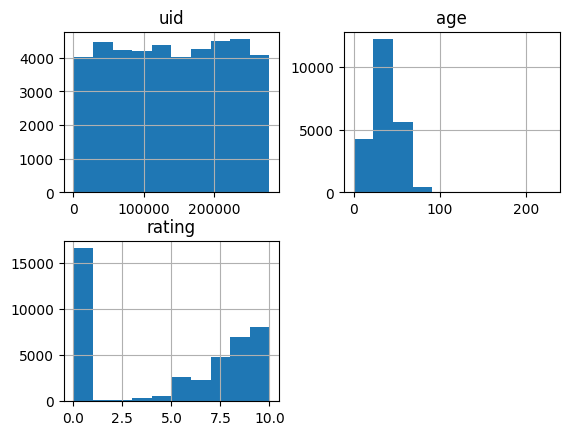

In [6]:
merged_dataset.hist()
plt.show()

Group by location, find mean on the rating

In [7]:
grouped_by_location = merged_dataset.groupby('location', as_index=False).count()
grouped_by_location

,location,uid,age,isbn,rating
0,"&#321;ód&#378;, &#322;ódzkie, poland",1,1,1,1
1,"&#36149;&#28207;, &#24191;&#35199;, china",1,1,1,1
2,", ,",2,0,2,2
3,", , belize",1,0,1,1
4,", , canada",4,0,4,4
...,...,...,...,...,...
10405,"zürich, zh, switzerland",1,1,1,1
10406,"århus, n/a, denmark",1,1,1,1
10407,"óbidos, connecticut, portugal",1,1,1,1
10408,"örebro, n/a, sweden",1,1,1,1


In [23]:
sample = grouped_by_location.sample(n=1000)
sample

,location,uid,age,isbn,rating
5578,"mauston, wisconsin, usa",4,3,4,4
3556,"grand rapids/mt pleasant, michigan, usa",4,4,4,4
714,"beerwah, queensland, australia",1,1,1,1
8942,"sturgeon falls, ontario, canada",1,0,1,1
2140,"craiova, dolj, romania",1,1,1,1
...,...,...,...,...,...
7657,"richfield, ohio, usa",1,0,1,1
5824,"milwaukie, oregon, usa",14,7,14,14
7512,"quincy, illinois, usa",4,4,4,4
2852,"esbjerg, n/a,",1,0,1,1


We take only 10 locations to test

In [24]:
locations = sample['location'].tolist()
locations


['mauston, wisconsin, usa',
 'grand rapids/mt pleasant, michigan, usa',
 'beerwah, queensland, australia',
 'sturgeon falls, ontario, canada',
 'craiova, dolj, romania',
 'forked river, new jersey, usa',
 'montclair, new jersey, usa',
 'melton mowbray, leicestershire, united kingdom',
 'goddard, kansas, usa',
 'boulder creek, california, usa',
 'aston, pennsylvania, usa',
 'phila, pennsylvania, usa',
 'summerland point, new south wales, australia',
 'red deer, alberta, canada',
 'lincoln, new brunswick, canada',
 'falkirk, scotland, united kingdom',
 'axton, virginia, usa',
 'atlantic beach, ,',
 'cincinnati, ohio, usa',
 'dafoe, saskatchewan, canada',
 'gilroy, california, usa',
 'middletown, new york, usa',
 'lowville, new york, usa',
 'fort ripley, minnesota, usa',
 'petaling jaya, selangor, malaysia',
 'new haven, connecticut, usa',
 'commerce twp, michigan, usa',
 'pelham, new hampshire, usa',
 'henderson, nevada, usa',
 'ozark, missouri, usa',
 'middleton, new hampshire, usa',
 '

In [25]:
locations_dataframe = pd.DataFrame(columns=['location', 'mean_rating'])
for location in locations:
    temp_dataframe = merged_dataset[merged_dataset['location'] == location]
    mean_rating = temp_dataframe['rating'].mean()
    locations_dataframe.loc[len(locations_dataframe.index)] = [location, mean_rating]
    
locations_dataframe

,location,mean_rating
0,"mauston, wisconsin, usa",6.000000
1,"grand rapids/mt pleasant, michigan, usa",8.750000
2,"beerwah, queensland, australia",8.000000
3,"sturgeon falls, ontario, canada",0.000000
4,"craiova, dolj, romania",6.000000
...,...,...
995,"richfield, ohio, usa",0.000000
996,"milwaukie, oregon, usa",5.214286
997,"quincy, illinois, usa",6.750000
998,"esbjerg, n/a,",0.000000
